# Titanic: Machine Learning from Disaster(Project2)

### Team Name: HBE
**Members:**
Bader Abanmi, Husain Al-Amer , Ebrahim Balghunaim

<span style="color:blue"> **Link of Kaggle:** </span>



### Problem Statement

**When boarding a ship we start to think about safety.The terrifiying accident that happened to the titanic will always be one of the most tragic accidents in history. The titanic is the largest moving object ever built. It was the most luxurious liner of her era -- the "ship of dreams" -- which ultimately carried over 1,500 people to their death in the ice cold waters of the North Atlantic in the early hours of April 15, 1912.**


**This is a study to analyze what affected the survivel rate outcome.Of the estimated 2,224 passengers and crew aboard the Titanic when it struck an iceberg and sank on April 15, 1912, some 1,500 died in the cold waters of the North Atlantic. A mere 700 people lived on.We were given labeled data containing information about approximatly 1300 passanges that were on the titanic.We will analyze the features of the passengers to try and predict who survived this accident.**



### Imports

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
train = pd.read_csv('../Data/train.csv') #Load the data
test = pd.read_csv('../Data/test.csv') #Load the data
y = train.Survived #load the target

print(('Test Shape: ',test.shape),('Train Shape: ',train.shape))

('Test Shape: ', (418, 11)) ('Train Shape: ', (891, 12))


### Data Exploration and Data cleaning

#### Check the missing values

In [3]:
train.columns #Get The Data Columns
train.info() #Get the info of data 
train.describe() #Give basic stat discription of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test.columns #Get The Data Columns
test.info() #Get the info of data 
test.describe() #Give basic stat discription of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
train.isnull().sum() #Get the null values in the train df

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum() #Get the null values in the test df

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

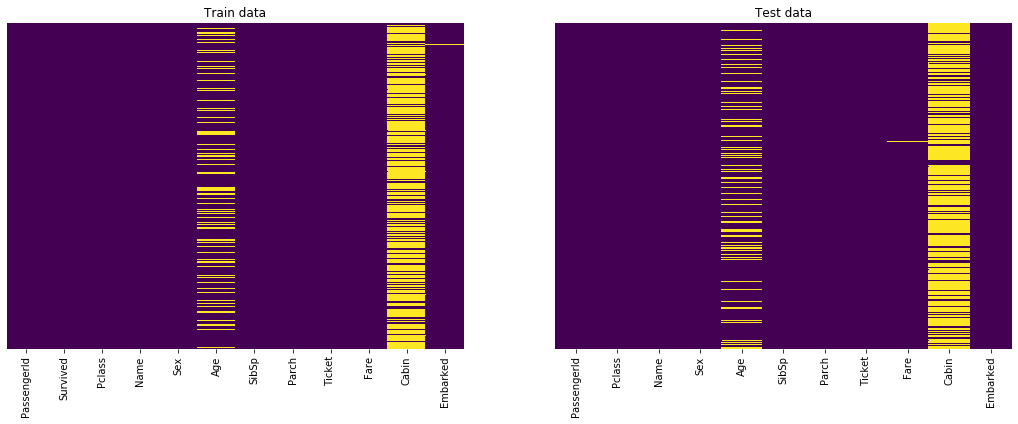

In [7]:
#Make null value heat maps that show null values
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data heatmap
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data heatmap
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

**In Train : `Age`,`Cabin` and `Embarked` are missing some data**

**In Test : `Age`,`Cabin` and `Fare` are missin some data**

#### Filling missing values 

##### Embarked

In [8]:
print('Missing values before cleaning train: ',train.Embarked.isnull().sum()) #Get Missing values before cleaning train
print('Missing values before cleaning test: ',test.Embarked.isnull().sum())#Get Missing values before cleaning test

train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True) #Fill the null values with the mode of embarked in train
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True) #Fill the null values with the mode of embarked in test

print('Missing values after cleaning train: ',train.Embarked.isnull().sum())#Get Missing values after cleaning train
print('Missing values after cleaning test: ',test.Embarked.isnull().sum())#Get Missing values after cleaning test

Missing values before cleaning train:  2
Missing values before cleaning test:  0
Missing values after cleaning train:  0
Missing values after cleaning test:  0


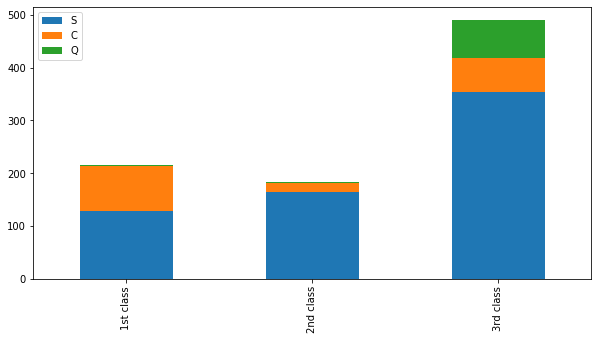

In [9]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts() #Get the embarked value of pclass1
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts() #Get the embarked value of pclass2
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts() #Get the embarked value of pclass3

grouped_pclass = train[['Pclass','Embarked']].groupby('Pclass') #Group the Pclass

df = pd.DataFrame([Pclass1, Pclass2, Pclass3]) #Place the values of Pclass1, Pclass2, Pclass3 in a dataframe
df.index = ['1st class','2nd class', '3rd class'] #Index the dataframe with these labels 
df.plot(kind='bar',stacked=True, figsize=(10,5)) #bar plot of classes and embarked

##### Fare

In [10]:
print('Missing values before cleaning train: ',train.Fare.isnull().sum()) #Get Missing values before cleaning train
print('Missing values before cleaning test: ',test.Fare.isnull().sum()) #Get Missing values before cleaning test

P3_fare_mean = test[test['Pclass']==3]['Fare'].mean() #All of the missing values are in pclass 3 therefore we will get the mode that 
test['Fare'].fillna(P3_fare_mean,inplace=True) #Implement it to the column

print('Missing values after cleaning train: ',train.Fare.isnull().sum()) #Get Missing values after cleaning train
print('Missing values after cleaning test: ',test.Fare.isnull().sum()) #Get Missing values after cleaning train

Missing values before cleaning train:  0
Missing values before cleaning test:  1
Missing values after cleaning train:  0
Missing values after cleaning test:  0


In [11]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

##### Age

In [12]:
def impute_age(data_set): #A function that will get the mean age of each class and fill the null values of a class with the class mean age
    df = data_set
    
    for i in range(df.shape[0]): #Iterate using the len of the df
        if np.isnan(df.Age[i]) == True: #if condition that will check if the value is null
            Pclass = df[df['Age'].isnull()]['Pclass'][i] #Grab the pclass value 
            if Pclass == 1: #If condition to place the mean age with pclass mean age
                df['Age'][i] = round(df[df['Pclass']==1]['Age'].mean()) 
            elif Pclass == 2:
                df['Age'][i] = round(df[df['Pclass']==2]['Age'].mean())
            elif Pclass == 3:
                df['Age'][i] = round(df[df['Pclass']==3]['Age'].mean())
        else:
            pass
    return df

In [13]:
print('Missing values before cleaning train: ',train.Age.isnull().sum()) #Get Missing values before cleaning train
print('Missing values before cleaning test: ',test.Age.isnull().sum()) #Get Missing values after cleaning test

train = impute_age(train) #Apply the function to fill age
test = impute_age(test)

print('Missing values after cleaning train: ',train.Age.isnull().sum()) #Get Missing values before cleaning train
print('Missing values after cleaning test: ',test.Age.isnull().sum()) #Get Missing values after cleaning test

Missing values before cleaning train:  177
Missing values before cleaning test:  86
Missing values after cleaning train:  0
Missing values after cleaning test:  0


##### Cabin

In [14]:
print('Missing values before cleaning train: ',train.Cabin.isnull().sum()) #Get Missing values before cleaning train
print('Missing values before cleaning test: ',test.Cabin.isnull().sum()) #Get Missing values before cleaning test 

train['Cabin']=train['Cabin'].map(lambda x: 0 if pd.isnull(x) else 1) #Fill the missing value of Cabin with value 0,1 
test['Cabin']=test['Cabin'].map(lambda x: 0 if pd.isnull(x) else 1) #If the value of cabin is null then 0 if there is a value then 1

print('Missing values after cleaning train: ',train.Cabin.isnull().sum()) #Get Missing values after cleaning train
print('Missing values after cleaning test: ',test.Cabin.isnull().sum()) #Get Missing values after cleaning test

Missing values before cleaning train:  687
Missing values before cleaning test:  327
Missing values after cleaning train:  0
Missing values after cleaning test:  0


In [15]:
train.isnull().sum() #Check the missing values of test after cleaning

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
test.isnull().sum() #Check the missing values of test after cleaning

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

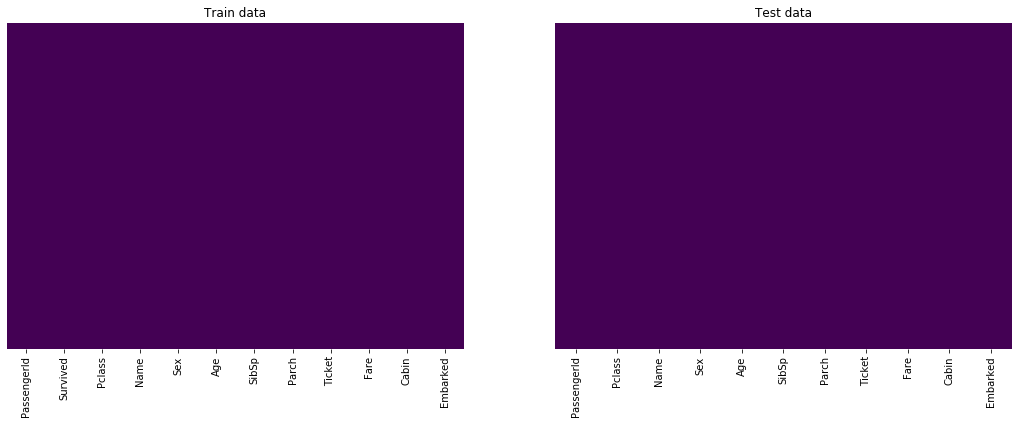

In [17]:
#Plot the missing value heat map to double check
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

**Done with filling the null values**

### Understand the Features

In [18]:
df_merged = pd.merge(train,test, on = list(test.columns) ,how = 'outer' ) #Merge data to understand the distributions

In [19]:
def no_outlier(Data_column,data_set): #This function will check the distribution of data with and without outliers
    import math #Import math
    X = data_set[Data_column] #Set the target column to a new varible
    no_outlier = [] #Make a list of the features values without outliers
    confidence = [] #Make a list to get the 90% confidance intervals
    
    q1 = float(X.describe()['25%']) #Get the first quartile (Using the describe function)
    q3 = float(X.describe()['75%']) #Get the third quartile (Using the describe function)
    iqr = (q3 - q1)*1.5 #Calculate the IQR
    std = float(X.describe()['std']) #Get the standered deviation
    mean = float(X.describe()['mean']) #Get the mean
    lower_limit = mean-(1.645*(std/math.sqrt(len(X)))) #Compute the upper limit of the 90% interval
    higher_limit = mean+(1.645*(std/math.sqrt(len(X)))) #Compute the upper limit of the 90% interval
    
    for total in X: #Loop over the target
        if lower_limit < total < higher_limit: #Get the points within the 90% interval
            confidence.append(total) #Append it to the list
        
        if (q1 - iqr) < (total) < (q3 + iqr): #Get points without the outliers 
            no_outlier.append(total) # Append it to the no_outlier list
        else:
            pass
    print('Tukeys method number of outliers is {}'.format((len(X)-len(sorted(no_outlier)))))
    print('90% confidence interval has {} values between {} and {}'.format(len(sorted(confidence)),round(lower_limit),round(higher_limit)))
    
    #Plot representaions
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
    sns.distplot(X, ax=ax[0,0])
    sns.distplot(no_outlier,color='red', ax=ax[0,1])
    sns.boxplot(X,notch=True,orient='v',ax=ax[1,0])
    sns.boxplot(no_outlier,notch=True,orient='v',color='red',ax=ax[1,1])
    
    fig.suptitle('{}'.format(Data_column), fontsize=24)
    ax[0,0].set_title('Distribution of {}'.format(Data_column), fontsize=12)
    ax[0,1].set_title('Distribution of {} after removing outliers'.format(Data_column), fontsize=10)
    ax[1,0].set_title('Boxplot of {}'.format(Data_column), fontsize=10)
    ax[1,1].set_title('Boxplot of {} after removing outliers'.format(Data_column), fontsize=10)
    

Tukeys method number of outliers is 40
90% confidence interval has 35 values between 29 and 30


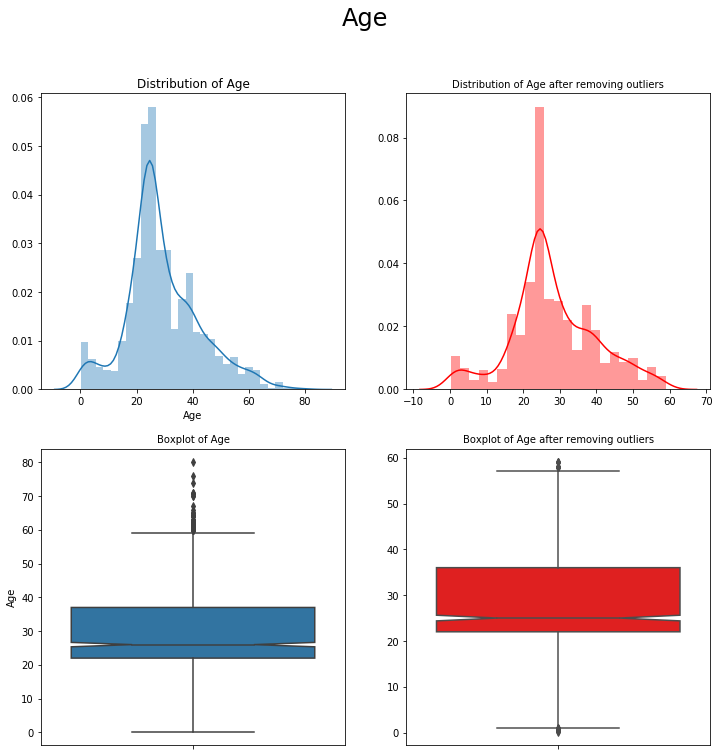

In [20]:
no_outlier('Age',df_merged) #Plot the distribution

Tukeys method number of outliers is 171
90% confidence interval has 42 values between 31 and 36


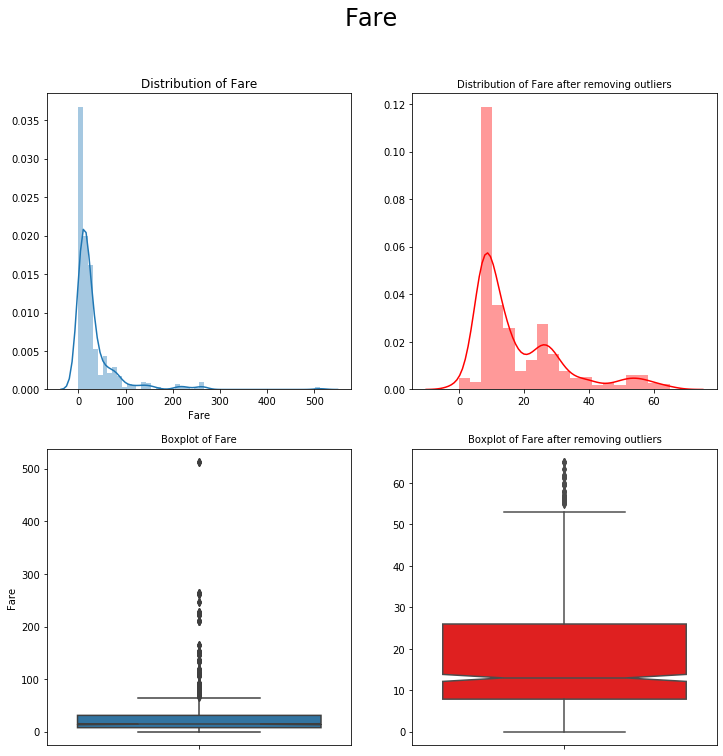

In [21]:
no_outlier('Fare',df_merged) #Plot the distribution

In [22]:
Grouped_Pclass_train = df_merged['Pclass'].value_counts() # Group the Pclass values


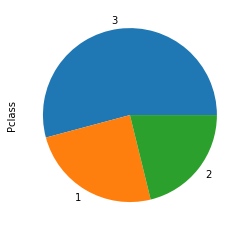

In [23]:
Grouped_Pclass_train.plot(kind='pie') #Plot a pie chart to represent pclass

### EDA

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|Survived|binary integer|train| Whether passenger survived wreck or not, 0 indicating dead and 1 indicating survived|
|Pclass|integer|train| The passenger class of the passenger, either 1st, 2nd, or 3rd class|
|SibSp|integer|train| Number of siblings and spouse on board for each passenger|
|Parch|integer|train| Number of parents and children for each passenger|
|Ticket|object|train| Ticket number as string object|
|Sex|object|train| Gender of passenger either male or female|
|Age|float|train| Age of passenger (e.g. 32.0)|
|Fare|float|train| The ticket cost or fare amount in float (e.g. 53.1)|
|Cabin|binary integer|train| Whether cabin data was available, 1, or not available, 0|
|Embarked|object|train| Embarkation point of passenger, S=Southampton, C=Cherbourg, or Q=Queenstown|

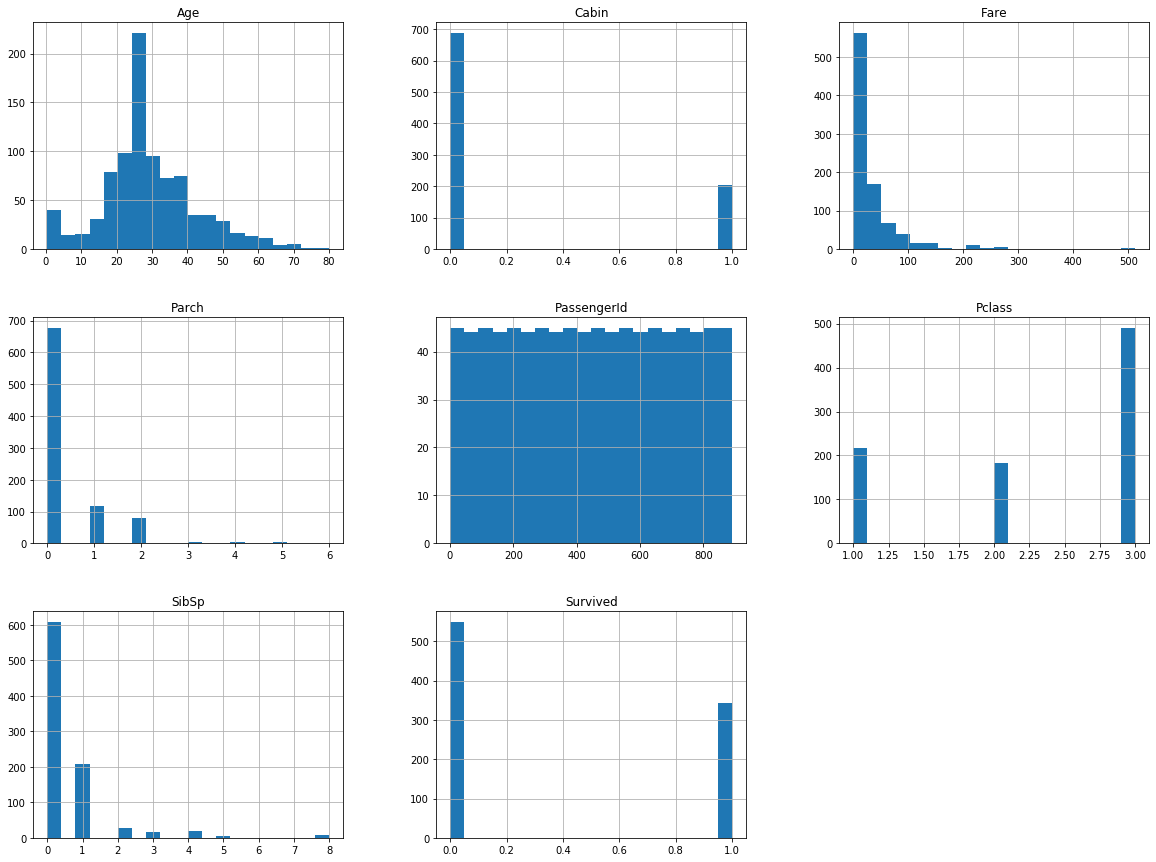

In [25]:
histo_grams = train.hist(bins=20, figsize=(20, 15)) #Histogram of columns

**Test data has exact same data dictionary except that there is not Survived feature**

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [27]:
train.shape

(891, 12)

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int64  
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [29]:
test.shape

(418, 11)

**Summary statistics for train dataset**

In [30]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.265062,13.212184,0.42,22.0000,26.0000,37.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Cabin,891.0,0.228956,0.420397,0.00,0.0000,0.0000,0.0,1.0000


**Defining a function for use in bar charts for categorical features**

In [31]:
def bar_chart(f): #function for use in bar charts for categorical features
    s = train[train['Survived']==1][f].value_counts() 
    d = train[train['Survived']==0][f].value_counts()
    df = pd.DataFrame([s,d])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

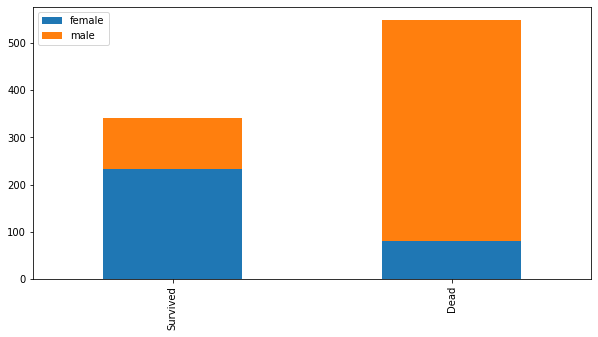

In [32]:
bar_chart('Sex')

This shows that more females than males survived.

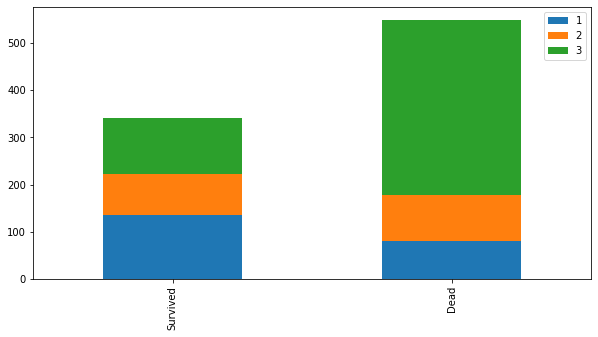

In [33]:
bar_chart('Pclass')

This shows that Pclass 3 had the highest mortalities.

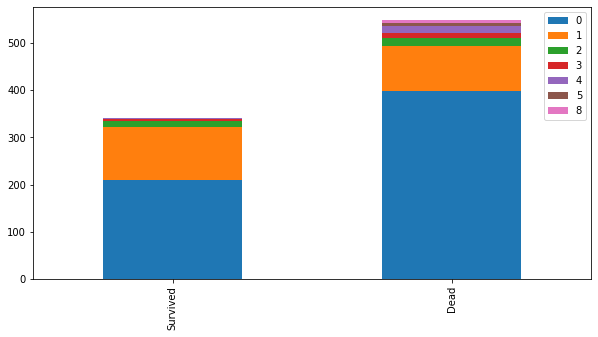

In [34]:
bar_chart('SibSp')

Bar chart for number of survived vs. dead given number of siblings and spouses, no clear indication.

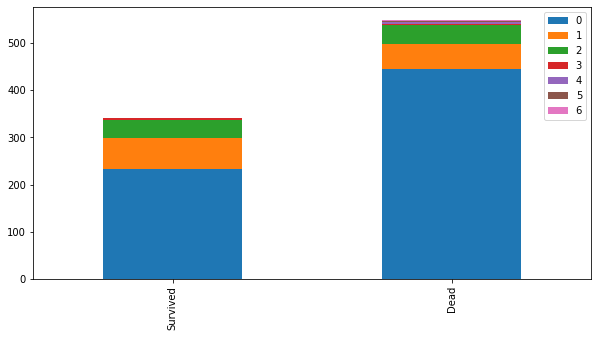

In [35]:
bar_chart('Parch')

Same as above but for parents and children.

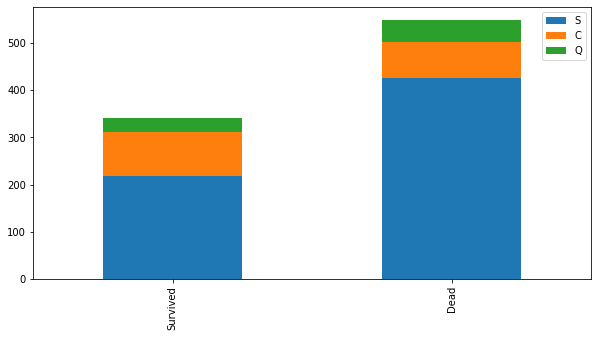

In [36]:
bar_chart('Embarked')

People who embarked from C had more chances of surviving.

**Some feature engineering**

In [37]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) 

In [38]:
#Create a dictionary that has the expected output of the extractions
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
train['Title'] = train['Title'].map(title_mapping) #Map the values to focuse on group 0 ,1 and 2. 3 will be other
test['Title'] = test['Title'].map(title_mapping)


#### Dummy the `Sex` and `Embarked` columns on both datasets

In [39]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True) #Get the dummie varibles of train
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True) #Get the dummie varibles of test

In [40]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,2,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",25.0,0,0,330877,8.4583,0,0,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,1,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,0,3,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,0,2,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,0,2,0,0,0


In [41]:
test.head(2)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,0,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,2,0,0,1


#### Model Prep: Create `X` and `y` variables

- Our features will be:`[Pclass, Age, SibSp, Parch, Fare, Cabin, Sex_male, Embarked_Q, Embarked_S]`

- And our target will be `Survived`

In [42]:
features_drop = ['PassengerId','Name', 'Ticket', 'Survived']
select_features = [x for x in train.columns if x not in features_drop]
select_features #select the features to drop

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Title',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S']

In [43]:
X_train = train[select_features] #specify the selected features 
y_train = train['Survived'] #make the target 

X_test = test[select_features]

##### Baseline accuracy

In [44]:
y_train.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

##### Split the data

In [45]:
xx_train , xx_test, yy_train, yy_test = train_test_split(X_train, y_train, test_size= .20 , shuffle = True ,stratify = y_train)

#### Standarize the data

In [46]:
ss_final = StandardScaler()
X_train_ss = ss_final.fit(X_train)
X_train_ss=ss_final.transform(X_train)
X_test_ss = ss_final.transform(X_test)




### Modeling

##### RandomForestClassifier

In [47]:
rf_final = RandomForestClassifier(n_estimators=100) # bootstrap=True by default #max_features='auto',
rf_final = rf_final.fit(X_train_ss,y_train)
pred_rf_training= rf_final.predict(X_train_ss)
pred_rf_final= rf_final.predict(X_test_ss)

print('confusion matrix for RF')
print(confusion_matrix(y_train,pred_rf_training, labels = [0,1]))
print(classification_report(y_train, pred_rf_training))
print('Training Score :' , rf_final.score(X_train_ss , y_train))

confusion matrix for RF
[[547   2]
 [ 10 332]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.97      0.98       342

    accuracy                           0.99       891
   macro avg       0.99      0.98      0.99       891
weighted avg       0.99      0.99      0.99       891

Training Score : 0.9865319865319865


##### ExtraTreesClassifier

In [48]:
et = ExtraTreesClassifier(n_estimators=100) # bootstrap=False by default #max_features='auto',
et = et.fit(X_train_ss,y_train)
pred_et = et.predict(X_train_ss)
sub_pred_et = et.predict(X_test_ss)

pred_et_training= et.predict(X_train_ss)
pred_et_final= et.predict(X_test_ss)

print('confusion matrix for ET')
print(confusion_matrix(y_train,pred_et_training, labels = [0,1]))
print(classification_report(y_train, pred_et_training))
print('Training Score :' , et.score(X_train_ss , y_train))

confusion matrix for ET
[[547   2]
 [ 10 332]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.97      0.98       342

    accuracy                           0.99       891
   macro avg       0.99      0.98      0.99       891
weighted avg       0.99      0.99      0.99       891

Training Score : 0.9865319865319865


##### KNN

In [49]:
param_grid = {'n_neighbors' : [3,4,5,6,7,10,15]}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, refit=True, verbose=1)
grid_knn.fit(X_train_ss, y_train)
pred_knn_final = grid_knn.predict(X_test_ss)

print('Training Score :' , grid_knn.score(X_train_ss , y_train))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training Score : 0.8507295173961841


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.3s finished


#### SVM

In [50]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_ss, y_train)
pred_svc_final = clf.predict(X_test_ss)
clf.score(X_train_ss, y_train)



0.8507295173961841

### Predicted submissions

In [51]:
# y_test= pred_et
Sub1 = [x for x in range (892,1310)]
Submission1 = {'PassengerId':Sub1,
               'Survived':pred_rf_final}
df_submission = pd.DataFrame(Submission1)
df_submission.to_csv('first_submission',index=False)

In [52]:
#1st for submission RandomForestClassifier 0.74641
#2nd forsubmission RandomForestClassifier 0.75119

In [53]:
# y_test= pred_et
Submission2 = {'PassengerId':Sub1,
               'Survived':pred_et_final}
df_submission = pd.DataFrame(Submission2)
df_submission.to_csv('et_submission',index=False)

In [54]:
#Base line score for ExtraTreesClassifier : 0.72727

In [55]:
# y_test= pred_et
Submission3 = {'PassengerId':Sub1,
               'Survived':pred_knn_final}
df_submission = pd.DataFrame(Submission3)
df_submission.to_csv('knn_submission',index=False)

In [56]:
#1st for submission KNeighborsClassifier : 0.75598
#2nd for submission KNeighborsClassifier : 0.77990

In [57]:
Submission4 = {'PassengerId':Sub1,
               'Survived':pred_svc_final}
df_submission = pd.DataFrame(Submission4)
df_submission.to_csv('svm_submission',index=False)

## We have submitted 6 submissions and the selected one is SVC : 0.78468